In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

In [2]:
def load2d(fname):
    pts = np.loadtxt(fname)
    return pts

def plot(*pcs, labels=None, scale=1.2, s=0.8, subplot=False, ticks=False, ticklabels=False):
    num_pcs = len(pcs)
    max_cols = 8  # Set the maximum number of columns based on the available space
    fig_cols = min(num_pcs, max_cols)
    fig_rows = int(np.ceil(num_pcs / fig_cols))

    fig_width = 100 / 72  # Set the width of each subplot
    fig_height = 100 / 72  # Set the height of each subplot

    fig = plt.figure(figsize=(fig_width * fig_cols * 3, fig_height * fig_rows * 3))
    gs = GridSpec(fig_rows, fig_cols, figure=fig)

    def configure_axes(ax):
        ax.set_xlim([-scale, scale])
        ax.set_ylim([-scale, scale])

        if not ticks:
            ax.set_xticks([])
            ax.set_yticks([])
        if not ticklabels:
            ax.set_xticklabels([])
            ax.set_yticklabels([])

    if subplot:
        for idx, pc in enumerate(pcs):
            ax = fig.add_subplot(gs[idx // fig_cols, idx % fig_cols])

            ax.scatter(pc[:, 0], pc[:, 1], s=s, alpha=0.6, label=labels[idx] if labels else None)
            configure_axes(ax)

            if labels:
                ax.set_title(labels[idx])

    else:
        ax = fig.add_subplot(gs[:, :])
        colors = plt.cm.copper(np.linspace(0, 1, num_pcs))

        for i, pc in enumerate(pcs):
            ax.scatter(pc[:, 0], pc[:, 1], s=1.5, color=colors[i], alpha=0.6, label=labels[i] if labels else None)

        configure_axes(ax)

        if labels:
            ax.legend(labels, markerscale=3)

    plt.tight_layout()
    plt.show()

In [3]:
def add_noise(pc, p=5, scale=1.2):
    n_noise = int(p / 100 * pc.shape[0])
    noise = np.random.uniform(low=-scale, high=scale, size=(n_noise, pc.shape[1]))
    data = np.concatenate((pc, noise))

    return data


def toRad(deg):
    return np.radians(deg)


def make_rot(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])


def transform_pc(pc, rot=None, scale=None, shift=None):
    pc_c = pc.copy()

    if rot is not None:
        pc_c = np.dot(pc_c, rot)

    if scale is not None:
        pc_c *= scale

    if shift is not None:
        pc_c += shift

    return pc_c

In [4]:
f = load2d('fish_source.txt')
plot(f, scale=1.9,s=10, ticks=True, ticklabels=True)

FileNotFoundError: fish_source.txt not found.

In [11]:
theta = toRad(55.0)
rot = make_rot(theta)
scale = np.array([1,1])
shift = np.array([1,2])

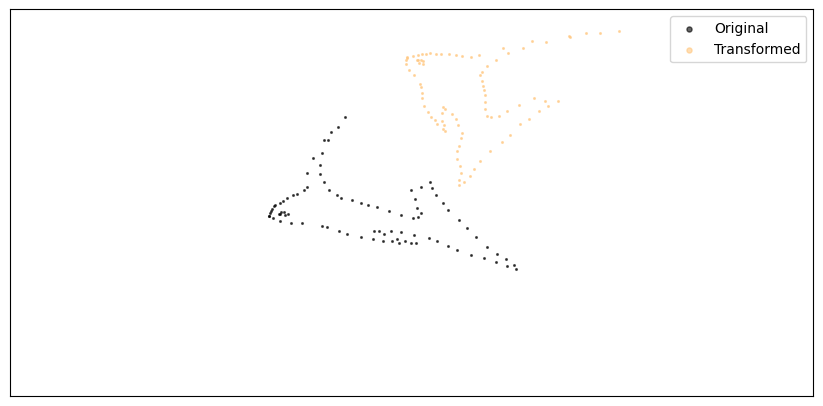

In [45]:
X = transform_pc(f, rot, scale, shift)
plot(f, X, labels=['Original', 'Transformed'], scale=4)

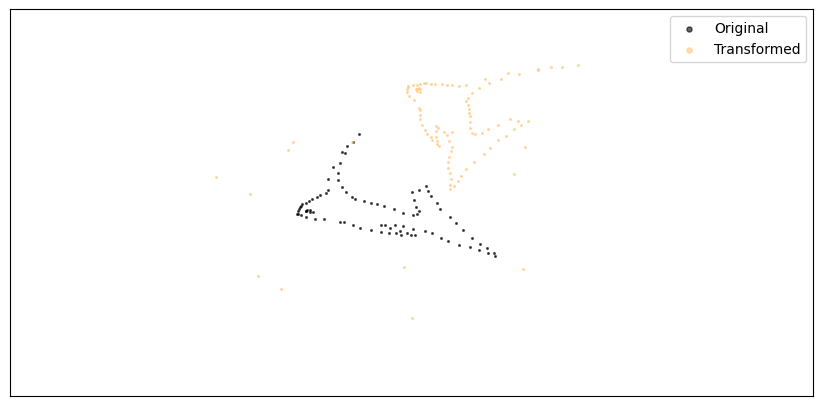

In [67]:
Xn = add_noise(X, p=15, scale=3)
plot(f, Xn, labels=['Original', 'Transformed', 'Noisy'], scale=5)